In [122]:
import os
import openslide
from PIL import Image
import numpy as np

In [39]:
in_path = "E:\\deeplearning\\Hepatocarcinomes\\TCGA\\diagnostic_slides"
out_path1 = "E:\\deeplearning\\Hepatocarcinomes\\TCGA\\snapshots_tiff"
out_path2 = "E:\\deeplearning\\Hepatocarcinomes\\TCGA\\snapshots_png"

In [22]:
roots = []
slides = []
for root, dirs, files in os.walk(in_path, topdown=False):
    for file in files:
        if file.endswith("svs"):
            roots.append(root)
            slides.append(file)
print(len(slides)) # 379

379


In [130]:
for i in range(len(slides)):
    f = openslide.OpenSlide(os.path.join(roots[i], slides[i]))

    # level counts : number of downsampled images
    levels=f.level_count
#     print("levels: "+str(levels))
    
    thumb_level=levels-1
    
    dims=f.level_dimensions
    
    img=f.read_region((0,0),thumb_level,dims[thumb_level])

    img.thumbnail((256, 256), resample=Image.LANCZOS) # or Image.ANTIALIAS
    img.save(os.path.join(out_path1, slides[i].split(".")[0])+".tiff")
    
    x = np.array(img)
    print(set(x[:,:,3].flatten().tolist())) #{0, 255}
    r, g, b, a = np.rollaxis(x, axis = -1)
    r[a == 0] = 255
    g[a == 0] = 255
    b[a == 0] = 255
    x = np.dstack([r, g, b, a])
    img = Image.fromarray(x, 'RGBA')

    # Create a new image with the desired new size, and paste the old image in the center, then saving it.
    old_size = img.size

    new_size = (256, 256)
    new_im = Image.new("RGB", new_size, color = (255, 255, 255))   ## Default color black!
    new_im.paste(img, (int((new_size[0]-old_size[0])/2), int((new_size[1]-old_size[1])/2)))

    new_im.save(os.path.join(out_path2, slides[i].split(".")[0])+".png")

{255}
{0, 1, 217, 253, 255}
{255}
{0, 4, 101, 251, 255}
{255}
{0, 1, 3, 4, 138, 139, 204, 207, 145, 113, 249, 251, 253, 255}
{0, 3, 70, 252, 255}
{255}
{255}
{255}
{0, 1, 226, 3, 228, 196, 8, 9, 235, 218, 251, 220, 253, 255}
{255}
{0, 4, 122, 251, 255}
{255}
{255}
{255}
{0, 1, 3, 4, 236, 238, 17, 18, 61, 247, 57, 252, 253, 254, 255}
{255}
{192, 0, 2, 1, 4, 3, 103, 104, 205, 79, 248, 251, 252, 189, 255}
{0, 248, 159, 195, 4, 3, 198, 2, 1, 150, 118, 152, 251, 252, 255}
{0, 4, 141, 251, 255}
{0, 1, 3, 4, 27, 123, 127, 55, 250, 251, 124, 254, 255}
{255}
{0, 3, 175, 252, 255}
{0, 4, 149, 251, 255}
{0, 1, 3, 220, 253, 255}
{0, 253, 214, 255}
{255}
{0, 1, 194, 230, 231, 10, 11, 213, 214, 219, 252, 253, 254, 255}
{255}
{32, 0, 2, 250, 254, 255}
{255}
{0, 224, 2, 195, 196, 226, 6, 1, 8, 201, 174, 250, 252, 253, 255}
{0, 3, 53, 254, 255}
{255}
{0, 1, 226, 159, 3, 229, 7, 10, 11, 176, 177, 243, 250, 252, 253, 255}
{255}
{0, 97, 4, 251, 255}
{255}
{0, 3, 70, 252, 255}
{0, 3, 52, 254, 255}
{255}
{0

{255}


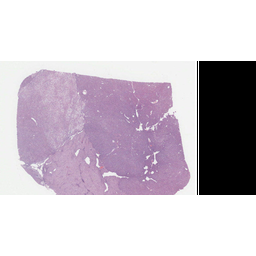

In [128]:
i=3
f = openslide.OpenSlide(os.path.join(roots[i], slides[i]))
# level counts : number of downsampled images
levels=f.level_count
#     print("levels: "+str(levels))

thumb_level=levels-1
img=f.read_region((0,0),thumb_level,dims[thumb_level])

img.thumbnail((256, 256), resample=Image.LANCZOS) # or Image.ANTIALIAS
# img.save(os.path.join(out_path1, slides[i].split(".")[0])+".tiff")

# Create a new image with the desired new size, and paste the old image in the center, then saving it.
old_size = img.size

new_size = (256, 256)
new_im = Image.new("RGB", new_size, color = (255, 255, 255))   ## Default color black!
new_im.paste(img, (int((new_size[0]-old_size[0])/2), int((new_size[1]-old_size[1])/2), int((new_size[0]+old_size[0])/2),
                  int((new_size[1]+old_size[1])/2)))

# new_im.save(os.path.join(out_path2, slides[i].split(".")[0])+".png")
new_im

In [129]:
np.array(img).tolist()

[[[240, 243, 242, 255],
  [241, 243, 240, 255],
  [243, 242, 240, 255],
  [243, 243, 238, 255],
  [240, 244, 237, 255],
  [240, 243, 239, 255],
  [240, 243, 241, 255],
  [240, 243, 241, 255],
  [240, 244, 240, 255],
  [241, 244, 240, 255],
  [241, 244, 240, 255],
  [242, 244, 240, 255],
  [243, 244, 241, 255],
  [240, 242, 239, 255],
  [240, 242, 239, 255],
  [241, 243, 240, 255],
  [240, 242, 239, 255],
  [241, 243, 240, 255],
  [240, 242, 239, 255],
  [240, 242, 239, 255],
  [242, 244, 241, 255],
  [241, 243, 240, 255],
  [240, 242, 239, 255],
  [241, 243, 240, 255],
  [241, 243, 240, 255],
  [242, 244, 241, 255],
  [243, 245, 242, 255],
  [242, 244, 241, 255],
  [242, 245, 241, 255],
  [241, 244, 240, 255],
  [242, 244, 241, 255],
  [241, 243, 240, 255],
  [242, 242, 242, 255],
  [242, 242, 241, 255],
  [240, 243, 239, 255],
  [242, 242, 242, 255],
  [243, 241, 244, 255],
  [242, 242, 242, 255],
  [242, 242, 242, 255],
  [242, 242, 242, 255],
  [242, 242, 242, 255],
  [242, 242, 242

{0, 4, 101, 251, 255}


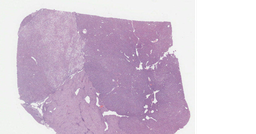

In [127]:
x = np.array(img)
print(set(x[:,:,3].flatten().tolist())) #{0, 255}
r, g, b, a = np.rollaxis(x, axis = -1)
r[a == 0] = 255
g[a == 0] = 255
b[a == 0] = 255
x = np.dstack([r, g, b, a])
img = Image.fromarray(x, 'RGBA')
img

In [25]:
# # down sample
# level_downsamples=f.level_downsamples

# # levels dimensions
# dims=f.level_dimensions

# for i in range(levels):
#     print("level "+str(i)+": (x,y)= "+str(dims[i])+"\tdownsampling= "+str(level_downsamples[i])) # no original (0)

level 0: (x,y)= (87583, 45967)	downsampling= 1.0
level 1: (x,y)= (21895, 11491)	downsampling= 4.0001990457339165
level 2: (x,y)= (5473, 2872)	downsampling= 16.003981784215956
level 3: (x,y)= (2736, 1436)	downsampling= 32.01088804590399
